Load Data

In [9]:
from keras.datasets import cifar10          
(X_train , y_train), (X_test , y_test) = cifar10.load_data()

preprocess

Training data shape : (50000, 32, 32, 3) (50000, 1)
Testing data shape : (10000, 32, 32, 3) (10000, 1)


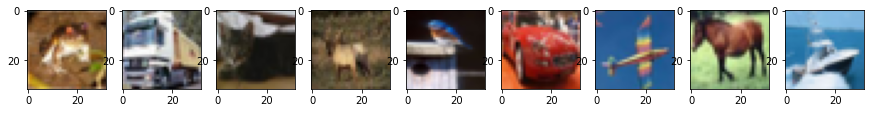

In [10]:
# Checkout the Data
print('Training data shape :', X_train.shape, y_train.shape)
print('Testing data shape :', X_test.shape, y_test.shape)

# Find the unique numbers from the train labels
import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)

import matplotlib.pyplot as plt

plt.figure(figsize=[15,10])

# Display 10 images in training data
plt.subplot(191)
plt.imshow(X_train[0,:,:], cmap='gray')

plt.subplot(192)
plt.imshow(X_train[1,:,:], cmap='gray')

plt.subplot(193)
plt.imshow(X_train[9,:,:], cmap='gray')

plt.subplot(194)
plt.imshow(X_train[3,:,:], cmap='gray')

plt.subplot(195)
plt.imshow(X_train[13,:,:], cmap='gray')

plt.subplot(196)
plt.imshow(X_train[5,:,:], cmap='gray')

plt.subplot(197)
plt.imshow(X_train[220,:,:], cmap='gray')

plt.subplot(198)
plt.imshow(X_train[7,:,:], cmap='gray')

plt.subplot(199)
plt.imshow(X_train[8,:,:], cmap='gray')


# Flatten the data
# Change from matrix to array of dimension 32*32 to array of dimension 1024
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) #(60000, 1024)
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:]))) #(10000, 1024)

# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization from [0;255] to [0;1], Scale the data to lie between 0 to 1
X_train /= 255
X_test /= 255

# convert labels to one-hot  vectors
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

Create Model

In [11]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(None,32,3072)))  #Hidden Layer 1 
model.add(Dense(512, activation='relu'))  #Hidden Layer 2
model.add(Dense(10, activation='softmax'))  #Last layer with one output per class
model.summary()

# Configure the Network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 32, 512)     1573376   
                                                                 
 dense_4 (Dense)             (None, None, 32, 512)     262656    
                                                                 
 dense_5 (Dense)             (None, None, 32, 10)      5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


Train Model (Fitting)

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8821 - accuracy: 0.3146 - val_loss: 1.7531 - val_accuracy: 0.3549
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6993 - accuracy: 0.3871 - val_loss: 1.6955 - val_accuracy: 0.3929
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6158 - accuracy: 0.4197 - val_loss: 1.6182 - val_accuracy: 0.4261
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5611 - accuracy: 0.4387 - val_loss: 1.5799 - val_accuracy: 0.4348
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5271 - accuracy: 0.4527 - val_loss: 1.6063 - val_accuracy: 0.4249
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4969 - accuracy: 0.4639 - val_loss: 1.6078 - val_accuracy: 0.4373
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4686 - accuracy: 0.4737 - val_loss: 1.5121 - val_accuracy:

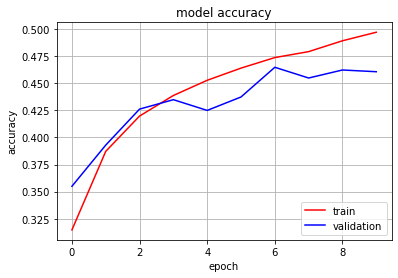

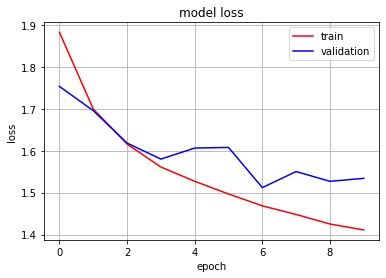

In [12]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Evaluation

313/313 [==============================] - 1s 4ms/step - loss: 1.4998 - accuracy: 0.4629
Test Loss 1.4997979402542114
Test Accuracy 0.4629000127315521
 classified correctly 10000000
 classified incorrectly 90000000
confusion matrix=
 [[541  18  53  22  18   7  73  18 190  60]
 [ 50 429  16  26   7  16  39  24 124 269]
 [ 75  21 277  84 126  45 269  46  32  25]
 [ 37  10  69 275  30 145 308  32  34  60]
 [ 67   5  95  51 317  40 318  52  32  23]
 [ 30   6  66 203  47 308 228  43  32  37]
 [  8   6  29  50  59  30 767  10  11  30]
 [ 59   2  55  70  93  55 135 419  34  78]
 [108  27  14  29  12  14  28   9 679  80]
 [ 34  86   7  33   6  16  53  27 121 617]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1000
           1       0.70      0.43      0.53      1000
           2       0.41      0.28      0.33      1000
           3       0.33      0.28      0.30      1000
           4       0.44      0.32      0.37      1000
          

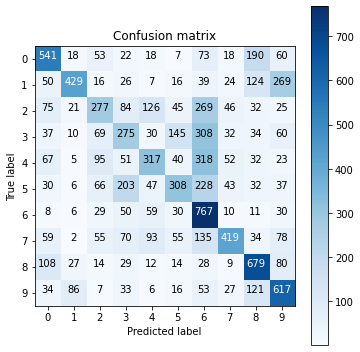

In [13]:
# Prediction Labels
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

correct_indices = np.nonzero(y_pred == y_test)[0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]

print(" classified correctly", len(correct_indices))
print(" classified incorrectly", len(incorrect_indices))


from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1,2,3,4,5,6,7,8,9]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True" .
  """
  plt.figure(figsize = (5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_mtx, class_names)

print(classification_report(y_test,y_pred))